# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Khong**  <br/>
Firstname: **Lap Hoe**    <br/>
Student ID: **32114818**    <br/>
Email: **lkho007@student.monash.edu**    <br/>
Your tutorial time: **Tuesday 2PM**    <br/>
***

## <span style="color:#0b486b">Instruction</span>

This assignment contains **one** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[30 points], 30%**

The first part of this assignment is for you to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 3**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation function below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Leaky ReLU: $\text{LeakyReLU}\left(x\right)=\begin{cases}
0.01x & \text{if}\,x<0\\
x & \text{otherwise}
\end{cases}$ 
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

<span style="color:red">**(b)**</span> Softplus: $\text{Softplus}\left(x\right)=\text{ln}\left(1+e^{x}\right)$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

<span style="color:#0b486b"> **Numpy is possibly being used in the following questions. You need to import numpy here.** </span>

### Question 1.1 Submission
(a)

The output range of $\text{LeakyReLu}$ is $(-\infty, +\infty)$.

The derivative of $\text{LeakyReLu}$ is $\text{LeakyReLu'(x)}$ $\begin{cases}
0.01 & \text{if}\,x<0\\
1 & \text{otherwise}
\end{cases}$ 

There's not much derivative steps to show for this simple function, but take the coefficient wrt $x$

In [2]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 

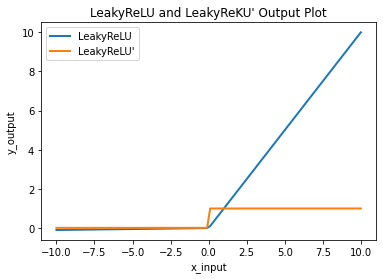

In [3]:
# Obtaining values in the rang of -10 to 10
x_val = np.linspace(-10, 10, 100) 

# Activation function
LeakyReLU_activation = lambda x: 0.01 * x if x < 0 else x

# Derivative function
LeakyReLU_derivative = lambda x: 0.01 if x < 0 else 1 

# Plots of activation and its derivative
plt.plot(x_val, list(map(LeakyReLU_activation, x_val)), linewidth=2)
plt.plot(x_val, list(map(LeakyReLU_derivative, x_val)), linewidth=2)
plt.title(label="LeakyReLU and LeakyReKU' Output Plot")
plt.xlabel("x_input")
plt.ylabel("y_output")
plt.legend(["LeakyReLU", "LeakyReLU'"])
plt.show()

(b)

The output range of softplus is $(0, +\infty)$

The derivative of softplus is as follows. 

$\text{1. The derivative of softplus is given by }\frac{d (softplus)}{dx}. \\
\text{2. We can use chain rule to solve this problem, given that the softplus is a \texttt{composite function}}. \\
\text{3. Let }(1+e^{x}) \text{ be y.} \\
\text{4. Then solve for the derivative } \text{through } \frac{d (softplus)}{dx} = \frac{d (softplus)}{dy} * \frac{dy}{dx} \\
5. \frac{d (softplus)}{dx} = \frac{\ln{(y)}}{dy} * \frac{d(1+e^{x})}{dx} \\
6. \frac{d (softplus)}{dx} = \frac{1}{y} * e^{x} \\
7. \frac{d (softplus)}{dx} = \frac{e^{x}}{1+e^{x}}$


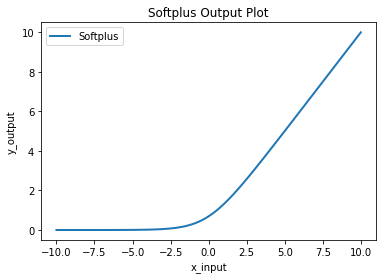

In [4]:
# Obtaining values in the rang of -10 to 10
x_val = np.linspace(-10, 10, 100) 

# Activation function
Softplus_activation = lambda x: np.emath.log(1 + np.exp(x))

# Derivative function
Softplus_derivative = lambda x: np.divide(np.exp(x), (1 + np.exp(x)))

# Plots of activation and its derivative
plt.plot(x_val, list(map(Softplus_activation, x_val)), linewidth=2)
plt.title(label="Softplus Output Plot")
plt.xlabel("x_input")
plt.ylabel("y_output")
plt.legend(["Softplus"])
plt.show()

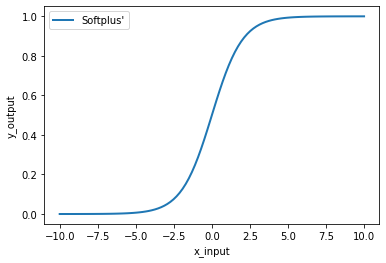

In [5]:
# Plot derivative 
plt.plot(x_val, list(map(Softplus_derivative, x_val)), linewidth=2)
plt.xlabel("x_input")
plt.ylabel("y_output")
plt.legend(["Softplus'"])
plt.show()

####  <span style="color:red">**Question 1.2**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=2$ to the feed-forward neural network with the ReLU activation function as shown in the following figure**
<img src="Figures/Q2_P1.png" width="500" align="center"/>


<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(e)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(e)**</span>  Assume that we are applying the label smoothing technique (i.e.,  [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) with $\alpha = 0.1$. What is the relevant loss caused by the feed-forward neural network at $(x,y)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


**You need to show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your numpy code for your computation.**

In [127]:
# Question 1.2 GLOBAL VARIABLES
import numpy as np
import tensorflow as tf 
X_INP = np.array([1, -1, 1], dtype='float64')
X_INP = np.reshape(X_INP, (3, 1))
Y_TRUE = 2

# These values are coded according to the matrix values 
W1_MAT = np.array([1, -1, 1, 1, -1, -1, 2, -1, 2, -1, -2, 1], dtype='float64')
W1_MAT = np.reshape(W1_MAT, (4, 3))

B1_MAT = np.array([1, 0, 1, 0], dtype='float64')
B1_MAT = np.reshape(B1_MAT, (4, 1))

W2_MAT = np.array([1, -1, -1, 2, 1, -1, 1, -1, -1, 2, -1, 2], dtype='float64') 
W2_MAT = np.reshape(W2_MAT, (3, 4))

B2_MAT = np.array([1, 1, 0], dtype='float64')
B2_MAT = np.reshape(B2_MAT, (3, 1))

W3_MAT = np.array([1, -2, 1, 1, 2, -1, -1, 1, -1], dtype='float64') 
W3_MAT = np.reshape(W3_MAT, (3, 3))

B3_MAT = np.reshape(np.array([0, 0, 0], dtype='float64'), (3, 1))

In [128]:
def ReLU_act(x):
    return np.maximum(x, 0)

$h_1 = W_1X_{inp} + b_1$

In [129]:
# (a) Latent presentation of h1 is as follows... 
h1 = ReLU_act(np.matmul(W1_MAT, X_INP) + B1_MAT)
h1

array([[4.],
       [1.],
       [6.],
       [2.]])

$h_2 = W_2h_1 + b_2$

In [130]:
# (b) Latent presentation of h2 is as follows... 
h2 = ReLU_act(np.matmul(W2_MAT, h1) + B2_MAT) 
h2

array([[2.],
       [8.],
       [0.]])

$h_3 = W_1X_{inp} + b_1$

In [131]:
# (c)
h3 = np.matmul(W3_MAT, h2) + B3_MAT
h3

array([[-14.],
       [ 18.],
       [  6.]])

$y_{pred} = softmax(h3), \text{obtaining predictions from logits}$

In [139]:
# (d) Apply softmax to get probability
y_pred = tf.nn.softmax(h3.flatten())
list(y_pred)

[<tf.Tensor: shape=(), dtype=float64, numpy=1.266408773824969e-14>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.9999938558253851>,
 <tf.Tensor: shape=(), dtype=float64, numpy=6.14417460221464e-06>]

$CE_{loss}(y_{pred}, label) = KL-divergence(y_{pred}, label) + entropy(label)$

$CE_{loss}(y_{pred}, label) = KL-divergence(y_{pred}, label) + 0$

$\text{The entropy of any unsmoothed label is 0.}$

In [140]:
# (e) Cross-entrophy 
# Since the label is y=2, we can one-hot the label first to y = [0,1,0] 
# The formula from above can be calculated from the softmax_cross_entropy_with_logits function, because we obtain logits from h3. 
CE_loss = tf.nn.softmax_cross_entropy_with_logits(
    [0,1,0], h3.flatten(), axis=-1, name=None
)
CE_loss

<tf.Tensor: shape=(), dtype=float64, numpy=6.144193490403898e-06>

In [147]:
# (f) Label smoothing 
def label_smoothing(y_labels, smoothing_factor, num_classes):
    smooth_labels = y_labels * (1 - smoothing_factor) + smoothing_factor / num_classes
    return smooth_labels 

smooth_labels = label_smoothing(np.array([0,1,0]), 0.1, 3)
print(f"The smoothed labels are \n {smooth_labels}")

The smoothed labels are 
 [0.03333333 0.93333333 0.03333333]


In [149]:
# (f) Loss from label smoothing
CE_loss = -np.sum(smooth_labels * np.log(y_pred))
print(f"The CE loss for smoothed labels with h3 is {CE_loss}")
CE_loss

The CE loss for smoothed labels with h3 is 1.4666728108601572


1.4666728108601572

####  <span style="color:red">**Question 1.3**</span> **Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is ($3 (Input)\rightarrow4(LeakyReLU)\rightarrow 3(Output)$) as shown in the following figure. Note that the LeakyReLU has the same formula as the one in Q1.1.**


<img src="Figures/Q3_P1.png" width="500" align="center"/>

We feed a feature vector $x=\left[\begin{array}{ccc}
1 & -1 & 1.5\end{array}\right]^{T}$ with ground-truth label $y=3$ to the above network. 


**You need to show both formulas, numerical results, and your numpy code for your computation for earning full marks.**

In [167]:
#Code to generate random matrices and biases for W1, b1, W2, b2
import numpy as np
student_id = 32114818          
np.random.seed(student_id)
W1 = np.random.rand(4,3)
b1 = np.random.rand(4,1)
W2 = np.random.rand(3,4)
b2 = np.random.rand(3,1)

**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


$\text{Formula for forward pass}$

$\bar{h}^{1}(x) = W_1x + b_1$


In [168]:
# Show your code
x = np.array([[1], [-1], [1.5]])
h1_lin = np.matmul(W1, x) + b1
h1_lin


array([[0.56751867],
       [1.71830858],
       [2.39623   ],
       [1.05539234]])

<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$h^1(x) = \sigma({\bar{h}^{1}(x)}), \text{where } \sigma \text{ is the LeakyReLu activation function}$


In [169]:
#Show your code
h1_act = np.array([LeakyReLU_activation(x[0]) for x in h1_lin])
h1_act = h1_act.reshape(4,1)
h1_act


array([[0.56751867],
       [1.71830858],
       [2.39623   ],
       [1.05539234]])

<span style="color:red">**(c)**</span>  What is the predicted value $\hat{y}$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$\hat{y} = \text{argmax}(h^1(x))$

In [172]:
h2_lin = np.matmul(W2, h1_act) + b2
h2_act = np.array(tf.keras.layers.Softmax(axis=0)(h2_lin)) 
idx = np.argmax(h2_act) # Get index of maximum probability 

print(f"The predicted value is class: {idx + 1}")

The predicted value is class: 1


<span style="color:red">**(d)**</span>  Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

In [173]:
# Class 3 so we one hot this for logit calculation
y_label = [[0],[0],[1]]

CE_loss = -np.sum(y_label * np.log(h2_act))
print(f"The CE loss for smoothed labels with h3 is {CE_loss}")

The CE loss for smoothed labels with h3 is 1.2348511219024658


**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

Source: Obtained from Lecture 3 slides

$\text{Eq 1: }\frac{\partial l}{\partial h^{2}} = pred^{T} - 1_y$

$\text{Eq 2: }\frac{\partial l}{\partial w^{2}} = (\frac{\partial l}{\partial h^{2}})^{T} - (h^{1})^{T}$

$\text{Eq 3: }\frac{\partial l}{\partial b^{2}} = \frac{\partial l}{\partial h^{2}}$

In [226]:
label = [0,0,1]
pred = np.array(h2_act)
dl_dh2 = pred.T - label # Eq 1
dl_dw2 = dl_dh2.T @ h1_act.T # Eq 2
dl_db2 = dl_dh2

print(f"dl_dh2 has the gradient \n {dl_dh2} of shape {dl_dh2.shape}")
print(f"dl_dw2 has the gradient \n {dl_dw2} of shape {dl_dw2.shape}")
print(f"dl_db2 has the gradient \n {dl_db2} of shape {dl_db2.shape}")

dl_dh2 has the gradient 
 [[ 0.47310027  0.23602167 -0.70912194]] of shape (1, 3)
dl_dw2 has the gradient 
 [[ 0.26849324  0.81293226  1.13365707  0.4993064 ]
 [ 0.1339467   0.40555806  0.5655622   0.24909546]
 [-0.40243994 -1.21849032 -1.69921927 -0.74840186]] of shape (3, 4)
dl_db2 has the gradient 
 [[ 0.47310027  0.23602167 -0.70912194]] of shape (1, 3)


<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

$h^1 = W^1(x) + b^1$

$\text{Eq 1: }(\frac{\partial l}{\partial h^{2}})(\frac{\partial h^{2}}{\partial h^{1}}) = (\frac{\partial l}{\partial h^{2}})(W^2)$

$\text{Eq 2: }(\sigma'({\bar{h}^{2}}))$

$\text{Eq 3: }\frac{\partial l}{\partial \bar{h}^{1}} = (eq1)(eq2)$

$\text{Eq 4: }\frac{\partial l}{\partial w^{1}} = (\frac{\partial l}{\partial \bar{h}^{1}})^{T}(x)^{T}$

$\text{Eq 5: }\frac{\partial l}{\partial b^{1}} = \frac{\partial l}{\partial \bar{h}^{1}}$

In [227]:
dl_dh1 = dl_dh2 @ W2 # Eq 1

dh1_dh_hat_1 = np.array([LeakyReLU_derivative(x[0]) for x in h1_lin])
dh1_dh_hat_1 = dh1_dh_hat_1.reshape(h1_lin.shape) # Eq 2

dl_dh_hat_1 = dl_dh1 @ dh1_dh_hat_1 # Eq 3
dh_hat_1_dw1 = x.T # For eq 4
 
dl_dw1 = dl_dh_hat_1.T @ dh_hat_1_dw1 # Eq 4
dl_db1 = dl_dh_hat_1 # Eq 5

print(f"The value of dl_dh1 is \n {dl_dh1} \n")
print(f"The value of dl_dh_hat_1 is \n {dl_dh_hat_1} \n")
print(f"The value of dl_dw1 is \n {dl_dw1} \n")
print(f"The value of dl_db1 is \n {dl_db1} \n")

The value of dl_dh1 is 
 [[-0.08663592 -0.20580223  0.30380736 -0.13027363]] 

The value of dl_dh_hat_1 is 
 [[-0.11890442]] 

The value of dl_dw1 is 
 [[-0.11890442  0.11890442 -0.17835662]] 

The value of dl_db1 is 
 [[-0.11890442]] 



**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[5 points]</span></div>

$W^2 = W^2 - \eta(\frac{\partial{l}}{\partial{W^{2}}})$

$b^2 = b^2 - \eta(\frac{\partial{l}}{\partial{b^{2}}})$

$W^1 = W^1 - \eta(\frac{\partial{l}}{\partial{W^{1}}})$

$b^1 = b^1 - \eta(\frac{\partial{l}}{\partial{b^{1}}})$

In [228]:
# Learning rate
lr = 0.01 

# Updates on weight values
W2 = W2 - (lr * dl_dw2) 
b2 = b2 - (lr * dl_db2) 
W1 = W1 - (lr * dl_dw1) 
b1 = b1 - (lr * dl_db1) 

print(f"The shape of W2 is {W2.shape} Value of W2 is  \n {W2}\n")
print(f"The shape of b2 is {b2.shape} Value of b2 is  \n {b2}\n")
print(f"The shape of W1 is {W1.shape} Value of W1 is  \n {W1}\n") 
print(f"The shape of b1 is {b1.shape} Value of b1 is  \n {b1}\n")

The shape of W2 is (3, 4) Value of W2 is  
 [[0.49556405 0.30345612 0.76409305 0.58152976]
 [0.9049582  0.01753259 0.89568573 0.07509656]
 [0.76026039 0.51746987 0.4059023  0.60832578]]

The shape of b2 is (3, 3) Value of b2 is  
 [[0.71293944 0.71768101 0.73658388]
 [0.54371502 0.54845659 0.56735946]
 [0.77812976 0.78287134 0.80177421]]

The shape of W1 is (4, 3) Value of W1 is  
 [[0.48557314 0.630463   0.26359839]
 [0.93942021 0.2591423  0.19342268]
 [0.6336805  0.22131348 0.856147  ]
 [0.83126463 0.87563021 0.61589165]]

The shape of b1 is (4, 1) Value of b1 is  
 [[0.32713923]
 [0.75802494]
 [0.70977078]
 [0.18604874]]

